### Introduction

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In this project, we will be predicting the onset of diabetes using Deep Learning Model. We will also be using Grid Search to tune the hyperparameters of our model such as:
- batch size and training epochs.
- learning rate
- dropout regularization.



### Dataset

The dataset which we will be using can be downloaded from Kaggle: https://www.kaggle.com/uciml/pima-indians-diabetes-database

The dataset consists of 768 entries against 9 features including the class column. Each record has a class value that indicates whether the patient suffered an onset of diabetes within 5 years of when the measurements were taken (1) or not (0).



##### Loading the Dataset

In [108]:
#importing necessary libraries

import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [109]:
path = os.getcwd() + '\diabetes.csv'

df = pd.read_csv(path)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [110]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [111]:
#checking if any missing values

df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

But from the above description, we can see that the min values from glucose column to BMI has 0 value which is not actually possible. Therefore, we can replace these values to NaN and then drop. 

In [112]:
# to check
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [113]:
df[df['DiabetesPedigreeFunction']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [114]:
#replacing zeros with NaN for columns 1 to 5
cols = df.loc[:,'Glucose':'BMI']

for i in cols:
    df[i].replace(0 , np.nan, inplace=True)

In [115]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [116]:
df['Glucose'].isnull().value_counts()

False    763
True       5
Name: Glucose, dtype: int64

In [117]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Zeros have been replaced with nan.

In [118]:
#droppping rows with NaN

df.dropna(inplace=True)

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Visualizations

In [119]:
import seaborn as sns
import random 
pallete = ['Accent_r', 'Blues', 'BrBG', 'BrBG_r', 'BuPu', 'CMRmap', 'CMRmap_r',
           'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'OrRd', 'Oranges', 'Paired', 'PuBu',
           'PuBuGn', 'PuRd', 'Purples', 'RdGy_r', 'RdPu', 'Reds', 'autumn', 'cool',
           'coolwarm', 'flag', 'flare', 'gist_rainbow', 'hot', 'magma', 'mako', 
           'plasma', 'prism', 'rainbow', 'rocket', 'seismic', 'spring', 'summer', 'terrain', 'turbo', 'twilight']

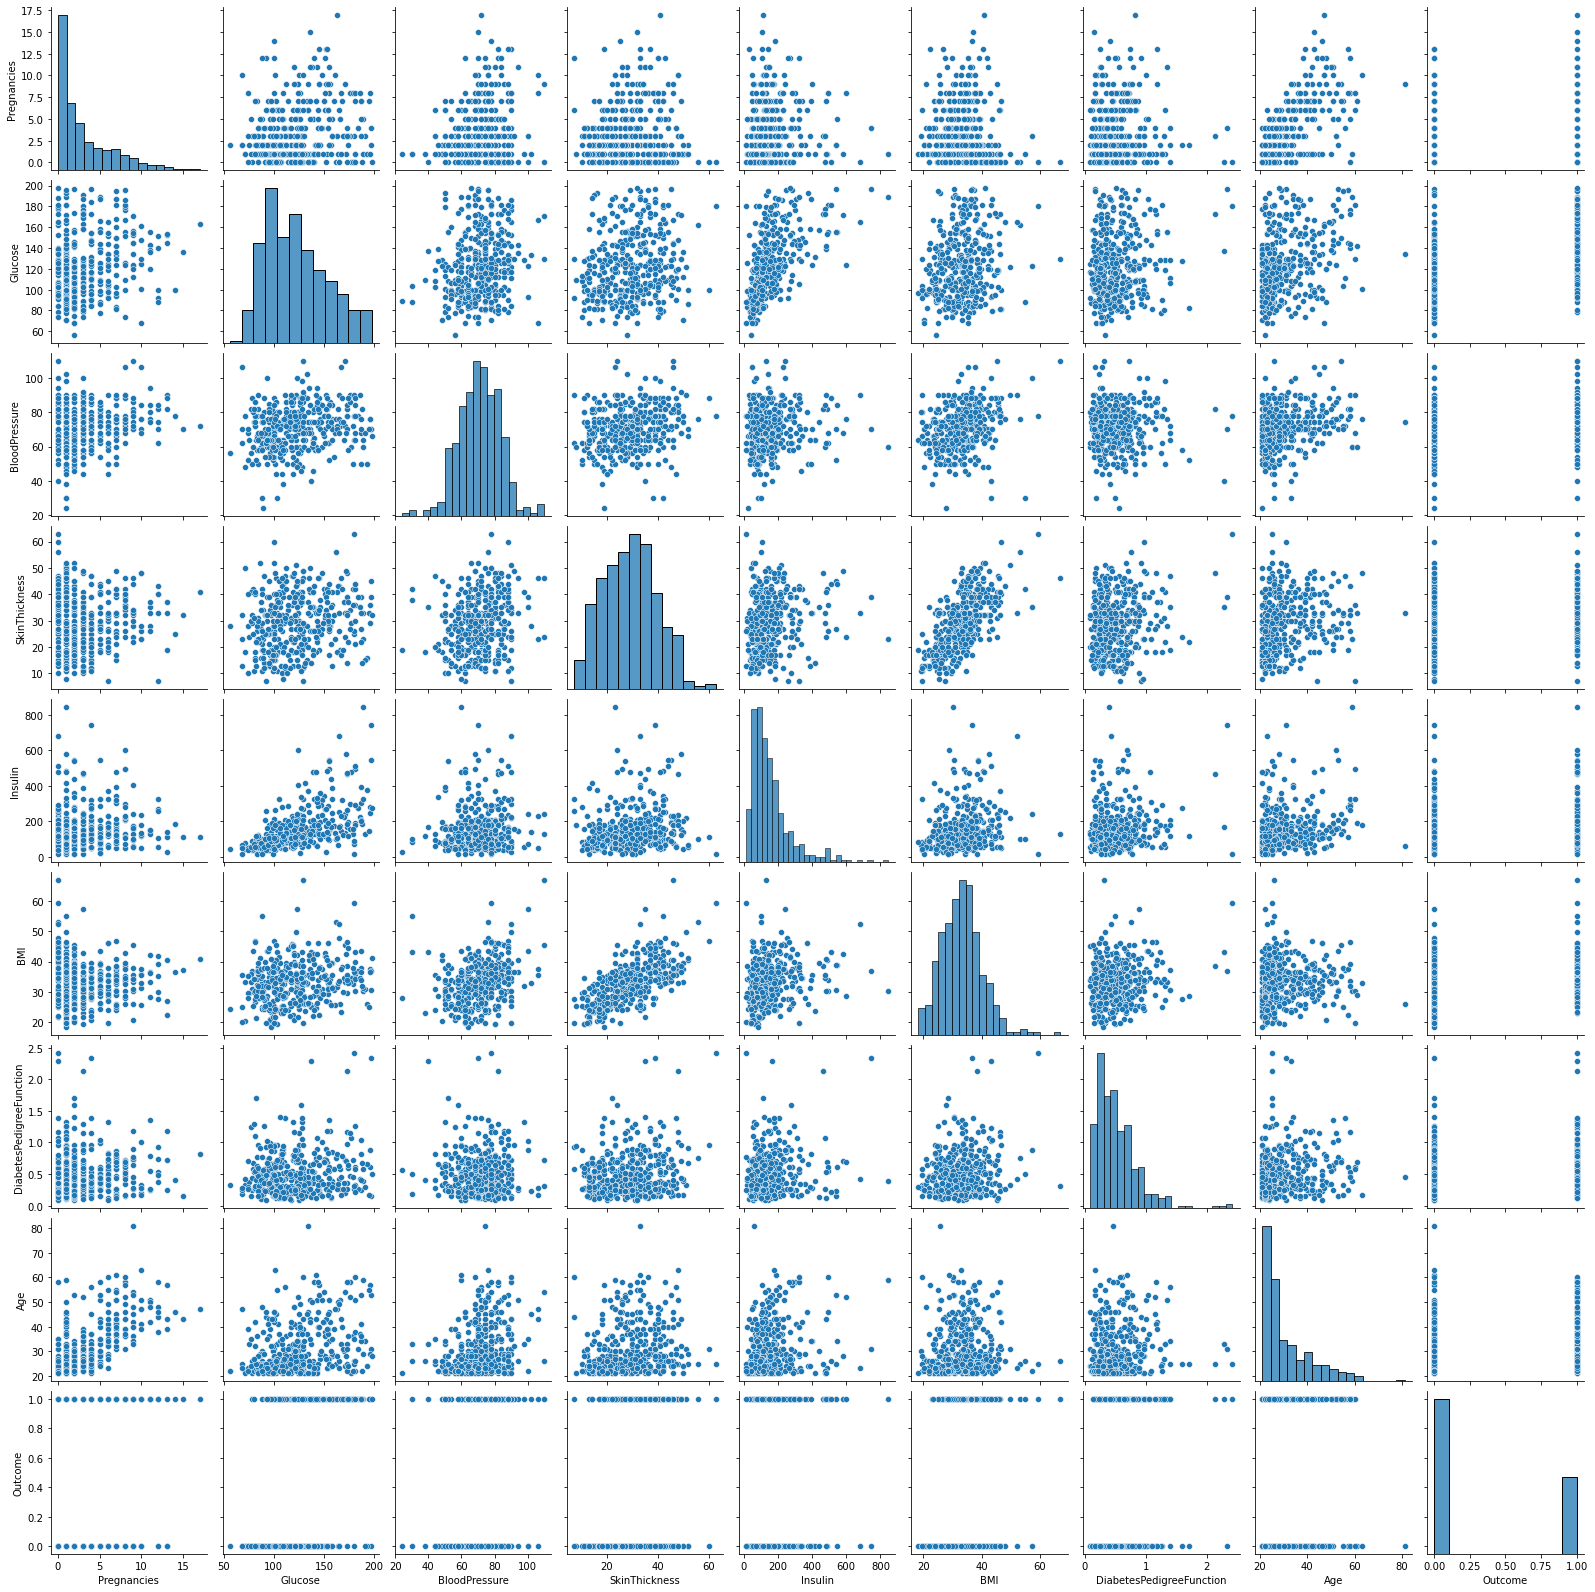

In [120]:
sns.pairplot(df)
plt.show()

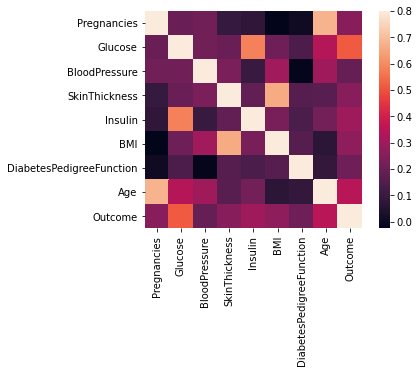

In [121]:
# plotting the correlation matrix

sns.heatmap(df.corr(), vmax = .8, square = True)
plt.show()

*We can oserve from the above graph that the outcome is quite strongly correlated with Glucose.*

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

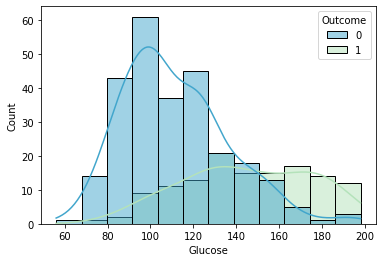

In [122]:
sns.histplot(x = 'Glucose', hue= 'Outcome', data= df, kde=True, palette=random.choice(pallete))

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

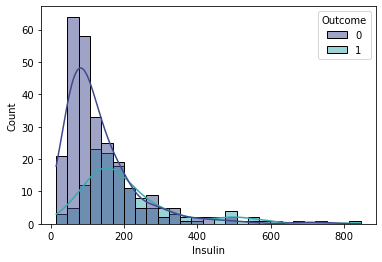

In [123]:
sns.histplot(x = 'Insulin', hue= 'Outcome', data= df, kde=True,palette=random.choice(pallete))

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

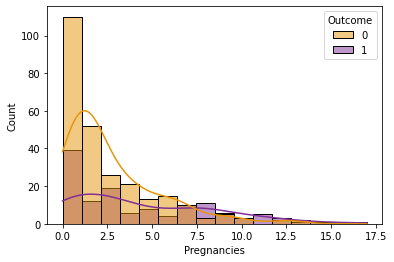

In [124]:
sns.histplot(x = 'Pregnancies', hue= 'Outcome', data= df, kde=True,palette=random.choice(pallete))

## Models

Keras is a Python library for deep learning that wraps the efficient numerical libraries TensorFlow and Theano.
Keras allows us to quickly and simply design and train neural network and deep learning models. We can use keras with scikit learn library of python as well which makes it highly efficient and useful. 

For this project, first we will create a Deep Neural Netowork for binary classification. Later on, we will use scikit learn's GridSearchCV to tune the hyperparamaters. 
The steps involved will be explained as the code progresses. 

In [125]:
# Importing libraries
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam_v2
from sklearn.model_selection import GridSearchCV,KFold
from keras.wrappers.scikit_learn import KerasClassifier
import random

In [126]:
print(keras.__version__)
print(tensorflow.__version__)

2.5.0
2.5.0


##### Creating X and y variables for our dataset:

In [127]:
X = np.array(df.drop(['Outcome'],axis=1))

y = np.array(df['Outcome'])

In [128]:
print(X.shape)
print(y.shape)

(392, 8)
(392,)


##### We should first split the data into train, test and validation sets and then standardize the data.. If we do the reverse then we might end up doing data leakage. 

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.25,random_state=0)  # 0.8*0.25=0.2

In [130]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_valid.shape)
print(y_valid.shape)

(234, 8)
(79, 8)
(234,)
(79,)
(79, 8)
(79,)


In [131]:
# standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_valid_scaled = scaler.transform(X_valid)

Now that we have created our train, test splits and performed standardization, we are ready to start building the model.
##### Neural Network Architecture
Our deep learning model will consists of total 3 layers:
- input layer with relu activation function and input shape is 8
- one hidden layer with relu activation function (*we can later see what happens if we add anoher hidden layer*)
- output layer with sigmoid activation function since this is a binary classification problem

##### Futher, we will use the binary cross entropy as loss function and Adam as an optimizer.

In [132]:
# building the model
def create_model():  # we are creating a function because the keras classifier which we will be using need a function parameter.
    model =Sequential()
    model.add(Dense(units=8,activation='relu',input_shape=[8]))
    model.add(Dense(units=4,activation='relu'))
    model.add(Dense(units=1,activation='sigmoid'))
    
    #compiling the model
    model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

model = create_model()

In [133]:
print(model)

In [134]:
model.summary()

Model: "sequential_806"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2390 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2391 (Dense)           (None, 4)                 36        
_________________________________________________________________
dense_2392 (Dense)           (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


We have created our deep learning model, now to fit and further use the model to make predictions first we will tune the hyperparameters.

### Hyperparameter tuning using GridSearchCV and KerasClassifier

Hyperparameter tuning is done to increase the efficiency of a model by tuning the parameters of the neural network. Some scikit-learn APIs like GridSearchCV and RandomizedSearchCV are used to perform hyper parameter tuning.

Steps involved:
- We will wrap Keras models for use in scikit-learn using KerasClassifier which is a wrapper.
- We will use cross validation using KerasClassifier and GridSearchCV
- Tune hyperparameters like number of epochs, number of neurons, batch size etc.

#### A. Batch Size and Epochs

#####  First we will tune the parameters batch_size and epoch.

- **Batch Size:** The batch size is a hyperparameter of gradient descent that controls the number of training samples to work through before the model’s internal parameters are updated.
- **Epochs:** The number of epochs is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset.

In [143]:
#copying the model from above to just use it in a single cell
def create_model():
    model =Sequential()
    model.add(Dense(units=8,activation='relu',input_shape=[8]))
    model.add(Dense(units=4,activation='relu'))
    model.add(Dense(units=1,activation='sigmoid'))
    
    #compiling the model
    model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

# in order to use grid search from scikit learn to tune our keras model we need to define the keras classifier model
model = KerasClassifier(build_fn = create_model,verbose=0)



# specifying batch sizes and epochs
batch_size = [10, 20, 40]
epochs = [10,50,100]

#creating dictionary for gridsearch
param_grid = dict(batch_size=batch_size, epochs=epochs)

#build and fit grid search

grid = GridSearchCV(estimator = model, param_grid = param_grid, cv=KFold(n_splits=3,random_state=0,shuffle=True),verbose=10)
grid_results = grid.fit(X_train_scaled,y_train)

# summarize the results
print("Best score: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=10, epochs=10, score=0.654, total=   2.6s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.628, total=   2.2s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.667, total=   2.1s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.8s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.718, total=   2.9s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.7s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.679, total=   3.1s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.8s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.769, total=   3.2s
[CV] batch_size=10, epochs=100 .......................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   16.0s remaining:    0.0s


[CV] ........... batch_size=10, epochs=100, score=0.731, total=   4.2s
[CV] batch_size=10, epochs=100 .......................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   20.2s remaining:    0.0s


[CV] ........... batch_size=10, epochs=100, score=0.769, total=   3.9s
[CV] batch_size=10, epochs=100 .......................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   24.1s remaining:    0.0s


[CV] ........... batch_size=10, epochs=100, score=0.744, total=   4.7s
[CV] batch_size=20, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   28.7s remaining:    0.0s


[CV] ............ batch_size=20, epochs=10, score=0.718, total=   2.1s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.654, total=   2.4s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.679, total=   2.1s
[CV] batch_size=20, epochs=50 ........................................
[CV] ............ batch_size=20, epochs=50, score=0.731, total=   2.6s
[CV] batch_size=20, epochs=50 ........................................
[CV] ............ batch_size=20, epochs=50, score=0.679, total=   2.6s
[CV] batch_size=20, epochs=50 ........................................
[CV] ............ batch_size=20, epochs=50, score=0.769, total=   2.5s
[CV] batch_size=20, epochs=100 .......................................
[CV] ........... batch_size=20, epochs=100, score=0.744, total=   3.4s
[CV] batch_size=20, epochs=100 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.2min finished


Best score: 0.7649572690327963, using {'batch_size': 20, 'epochs': 100}
0.6495726505915324 (0.015989998499299902) with: {'batch_size': 10, 'epochs': 10}
0.7222222288449606 (0.03676208314775633) with: {'batch_size': 10, 'epochs': 50}
0.747863252957662 (0.015989998499299902) with: {'batch_size': 10, 'epochs': 100}
0.6837606827418009 (0.026343660907334462) with: {'batch_size': 20, 'epochs': 10}
0.7264957229296366 (0.03676208314775633) with: {'batch_size': 20, 'epochs': 50}
0.7649572690327963 (0.021790684279676308) with: {'batch_size': 20, 'epochs': 100}
0.6196581224600474 (0.1382133497670707) with: {'batch_size': 40, 'epochs': 10}
0.7606837550799052 (0.006043661391169153) with: {'batch_size': 40, 'epochs': 50}
0.7136752208073934 (0.039630854478946945) with: {'batch_size': 40, 'epochs': 100}


**Therefore the best number of epochs are 100 with batch size 20.**

##### Now if we check the model using these parameters:

In [136]:
print(model)

Minimum validation loss: 0.4686093330383301


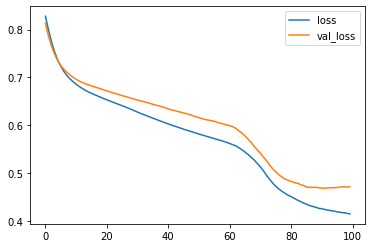

In [144]:
history= model.fit(X_train_scaled,y_train,validation_data=(X_valid_scaled,y_valid),epochs=100,batch_size=20,verbose=0)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

#### B. Learning Rate and Dropout Rate

#####  We can further improve our model by adding dropout layers and tuning the learning rate so as to prevent overfitting.

- **Learning Rate:** The learning rate plays an important role in optimization algorithm. If the learning rate is too large, the algorithm may diverge and thus can’t find the local optima. If the learning rate is too small, the algorithm may take many iterations to converge which results in high computational power and time. Thus we need an optimum value of learning rate which is small enough for the algorithm to converge and large enough to fasten the converging process. The learning rate helps with ‘Early Stopping’ which is a regularization method where the training set is trained as long as test set accuracy is increasing.
- **Dropout:** Drop out is a regularization method that reduces the complexity of the model and thus prevents overfitting the training data. It does so by not including some of neurons, determined by the dropout rate, during each epoch. Therefore it forces the model to spread out its learning by not giving importance to any neuron more. 

In [138]:
# tuning learning rate and dropout rate now

from keras.layers import Dropout

def create_model(learn_rate,dropout_rate):
    model =Sequential()
    model.add(Dense(units=8,activation='relu',input_shape=[8]))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units=4,activation='relu'))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units=1,activation='sigmoid'))
    
    #compiling the model
    opt=adam_v2.Adam(learning_rate= learn_rate)
    model.compile(loss = 'binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    return model

# in order to use grid search from scikit learn to tune our keras model we need to define the keras classifier model
model = KerasClassifier(build_fn = create_model,epochs=100,batch_size=20,verbose=0)  # using values which we got from above


# define the grid search parameters for dropout rate and learning rate
learn_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]

#creating dictionary for gridsearch
param_grid = dict(learn_rate=learn_rate, dropout_rate=dropout_rate)

#build and fit grid search

grid = GridSearchCV(estimator = model, param_grid = param_grid, cv=KFold(n_splits=3,random_state=0,shuffle=True),verbose=10)
grid_results = grid.fit(X_train_scaled,y_train)

# summarize the results
print("Best score: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.731, total=   3.2s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.731, total=   3.4s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.5s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.756, total=   3.0s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.5s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.654, total=   3.2s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.7s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.667, total=   3.4s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.1s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.718, total=   3.3s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   19.4s remaining:    0.0s


[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.744, total=   3.2s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   22.6s remaining:    0.0s


[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.718, total=   3.4s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   26.0s remaining:    0.0s


[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.705, total=   3.4s
[CV] dropout_rate=0.1, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   29.4s remaining:    0.0s


[CV] .. dropout_rate=0.1, learn_rate=0.001, score=0.731, total=   3.3s
[CV] dropout_rate=0.1, learn_rate=0.001 ..............................
[CV] .. dropout_rate=0.1, learn_rate=0.001, score=0.744, total=   3.6s
[CV] dropout_rate=0.1, learn_rate=0.001 ..............................
[CV] .. dropout_rate=0.1, learn_rate=0.001, score=0.705, total=   3.2s
[CV] dropout_rate=0.1, learn_rate=0.01 ...............................
[CV] ... dropout_rate=0.1, learn_rate=0.01, score=0.731, total=   3.4s
[CV] dropout_rate=0.1, learn_rate=0.01 ...............................
[CV] ... dropout_rate=0.1, learn_rate=0.01, score=0.756, total=   3.3s
[CV] dropout_rate=0.1, learn_rate=0.01 ...............................
[CV] ... dropout_rate=0.1, learn_rate=0.01, score=0.641, total=   3.4s
[CV] dropout_rate=0.1, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.1, learn_rate=0.1, score=0.744, total=   3.6s
[CV] dropout_rate=0.1, learn_rate=0.1 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.5min finished


Best score: 0.7393162250518799, using {'dropout_rate': 0.0, 'learn_rate': 0.001}
0.7393162250518799 (0.012087294684439299) with: {'dropout_rate': 0.0, 'learn_rate': 0.001}
0.6794871886571249 (0.027695480616538624) with: {'dropout_rate': 0.0, 'learn_rate': 0.01}
0.7222222288449606 (0.015989998499299902) with: {'dropout_rate': 0.0, 'learn_rate': 0.1}
0.7264957229296366 (0.015989998499299902) with: {'dropout_rate': 0.1, 'learn_rate': 0.001}
0.7094017068545023 (0.04946937179403843) with: {'dropout_rate': 0.1, 'learn_rate': 0.01}
0.688034196694692 (0.03963085447894695) with: {'dropout_rate': 0.1, 'learn_rate': 0.1}
0.6965812047322592 (0.06969875467444663) with: {'dropout_rate': 0.2, 'learn_rate': 0.001}
0.7008547186851501 (0.024174589368878598) with: {'dropout_rate': 0.2, 'learn_rate': 0.01}
0.7350427309672037 (0.01598997725928472) with: {'dropout_rate': 0.2, 'learn_rate': 0.1}


**Therefore the best dropout rate is 0 and best learning rate is 0.001**

So here adding dopout layers won't improve our model!

#### C. Activation Function and Kernel Initializers

Now, to further improve we will check the best activation function and also kernel initializer that can be used(*the default kernel initializer which we were using draws value from normal distribution)

- **Activation Function:** An activation function in a neural network defines how the weighted sum of the input is transformed into an output from a node or nodes in a layer of the network.The choice of activation function in the hidden layer will control how well the network model learns the training dataset.  Commonl used activation functions are:
1. Rectified Linear Activation (ReLU)
2. Logistic (Sigmoid)
3. Hyperbolic Tangent (Tanh)

- **Kernel Initializer:** The neural network needs to start with some weights and then iteratively update them to better values. The term kernel_initializer is a fancy term for which statistical distribution or function to use for initialising the weights. In case of statistical distribution, the library will generate numbers from that statistical distribution and use as starting weights.

In [139]:
# we don't need the dropout layers

def create_model(activation,init):
    model =Sequential()
    model.add(Dense(units=8,activation=activation,kernel_initializer=init,input_shape=[8])) #adding kernel initializer
    model.add(Dense(units=4,activation=activation,kernel_initializer=init))
    model.add(Dense(units=1,activation='sigmoid'))
    
    #compiling the model
    opt=adam_v2.Adam(learning_rate= 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    return model

# in order to use grid search from scikit learn to tune our keras model we need to define the keras classifier model
model = KerasClassifier(build_fn = create_model,epochs=100,batch_size=20,verbose=0)  # using values which we got from above


# define the grid search parameters for activation functions and initializers
activation = ['softmax', 'relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']

#creating dictionary for gridsearch
param_grid = dict(activation=activation, init=init)

#build and fit grid search

grid = GridSearchCV(estimator = model, param_grid = param_grid, cv=KFold(n_splits=3,random_state=0,shuffle=True),verbose=10)
grid_results = grid.fit(X_train_scaled,y_train)

# summarize the results
print("Best score: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... activation=softmax, init=uniform, score=0.692, total=   3.8s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.654, total=   3.1s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.8s remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.679, total=   2.7s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.5s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.667, total=   3.3s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.8s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.654, total=   3.0s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.9s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.756, total=   3.1s
[CV] activation=softmax, init=zero ...................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   18.9s remaining:    0.0s


[CV] ....... activation=softmax, init=zero, score=0.667, total=   3.1s
[CV] activation=softmax, init=zero ...................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   22.1s remaining:    0.0s


[CV] ....... activation=softmax, init=zero, score=0.654, total=   2.8s
[CV] activation=softmax, init=zero ...................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   24.9s remaining:    0.0s


[CV] ....... activation=softmax, init=zero, score=0.679, total=   3.1s
[CV] activation=relu, init=uniform ...................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   27.9s remaining:    0.0s


[CV] ....... activation=relu, init=uniform, score=0.744, total=   3.1s
[CV] activation=relu, init=uniform ...................................
[CV] ....... activation=relu, init=uniform, score=0.705, total=   3.1s
[CV] activation=relu, init=uniform ...................................
[CV] ....... activation=relu, init=uniform, score=0.769, total=   3.2s
[CV] activation=relu, init=normal ....................................
[CV] ........ activation=relu, init=normal, score=0.731, total=   3.2s
[CV] activation=relu, init=normal ....................................
[CV] ........ activation=relu, init=normal, score=0.718, total=   3.2s
[CV] activation=relu, init=normal ....................................
[CV] ........ activation=relu, init=normal, score=0.744, total=   3.1s
[CV] activation=relu, init=zero ......................................
[CV] .......... activation=relu, init=zero, score=0.667, total=   3.0s
[CV] activation=relu, init=zero ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  1.8min finished


Best score: 0.7606837550799052, using {'activation': 'linear', 'init': 'normal'}
0.6752136747042338 (0.015989998499299902) with: {'activation': 'softmax', 'init': 'uniform'}
0.692307690779368 (0.045628531236437814) with: {'activation': 'softmax', 'init': 'normal'}
0.6666666666666666 (0.01046790425976247) with: {'activation': 'softmax', 'init': 'zero'}
0.7393162449200948 (0.026343660907334462) with: {'activation': 'relu', 'init': 'uniform'}
0.7307692368825277 (0.01046790425976247) with: {'activation': 'relu', 'init': 'normal'}
0.6666666666666666 (0.01046790425976247) with: {'activation': 'relu', 'init': 'zero'}
0.7435897390047709 (0.03140371277926227) with: {'activation': 'tanh', 'init': 'uniform'}
0.7435897390047709 (0.03140371277926227) with: {'activation': 'tanh', 'init': 'normal'}
0.6666666666666666 (0.01046790425976247) with: {'activation': 'tanh', 'init': 'zero'}
0.752136747042338 (0.039630837339389234) with: {'activation': 'linear', 'init': 'uniform'}
0.7606837550799052 (0.033649

**So the best initializer is the normal distrubution one and surprisingly the best activation function is linear!**

#### D. Number of Neurons

We can also check the number of neurons which we should be using for each layer.

In [146]:
# tuning number of neurons for each layer

def create_model(neuron1,neuron2):
    model =Sequential()
    model.add(Dense(units=neuron1,activation='linear',kernel_initializer='uniform',input_shape=[8])) #adding kernel initializer
    model.add(Dense(units=neuron2,activation='linear',kernel_initializer='uniform',input_shape=[neuron1]))
    model.add(Dense(units=1,activation='sigmoid'))
    
    #compiling the model
    opt=adam_v2.Adam(learning_rate= 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    return model

# in order to use grid search from scikit learn to tune our keras model we need to define the keras classifier model
model = KerasClassifier(build_fn = create_model,epochs=100,batch_size=20,verbose=0)  # using values which we got from above


# define the grid search parameters for no. of neurons
neuron1 = [4, 8, 16]
neuron2 = [2, 4, 8]

#creating dictionary for gridsearch
param_grid = dict(neuron1=neuron1, neuron2=neuron2)

#build and fit grid search

grid = GridSearchCV(estimator = model, param_grid = param_grid, cv=KFold(n_splits=3,random_state=0,shuffle=True),refit=True,verbose=10)
grid_results = grid.fit(X_train_scaled,y_train)                             # refit = true keeps the model with the best values

# summarize the results
print("Best score: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ neuron1=4, neuron2=2, score=0.731, total=   3.0s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.718, total=   2.9s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.8s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.808, total=   3.1s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.9s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.731, total=   3.0s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.9s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.731, total=   3.1s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.0s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.808, total=   2.9s
[CV] neuron1=4, neuron2=8 ............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   17.9s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=8, score=0.731, total=   2.8s
[CV] neuron1=4, neuron2=8 ............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   20.7s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=8, score=0.731, total=   2.7s
[CV] neuron1=4, neuron2=8 ............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   23.4s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=8, score=0.808, total=   3.2s
[CV] neuron1=8, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   26.6s remaining:    0.0s


[CV] ................ neuron1=8, neuron2=2, score=0.731, total=   3.1s
[CV] neuron1=8, neuron2=2 ............................................
[CV] ................ neuron1=8, neuron2=2, score=0.744, total=   3.2s
[CV] neuron1=8, neuron2=2 ............................................
[CV] ................ neuron1=8, neuron2=2, score=0.808, total=   3.2s
[CV] neuron1=8, neuron2=4 ............................................
[CV] ................ neuron1=8, neuron2=4, score=0.731, total=   2.7s
[CV] neuron1=8, neuron2=4 ............................................
[CV] ................ neuron1=8, neuron2=4, score=0.744, total=   3.0s
[CV] neuron1=8, neuron2=4 ............................................
[CV] ................ neuron1=8, neuron2=4, score=0.808, total=   3.5s
[CV] neuron1=8, neuron2=8 ............................................
[CV] ................ neuron1=8, neuron2=8, score=0.744, total=   3.4s
[CV] neuron1=8, neuron2=8 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.4min finished


Best score: 0.7692307829856873, using {'neuron1': 16, 'neuron2': 4}
0.752136747042338 (0.039630837339389234) with: {'neuron1': 4, 'neuron2': 2}
0.7564102411270142 (0.0362618840533179) with: {'neuron1': 4, 'neuron2': 4}
0.7564102411270142 (0.0362618840533179) with: {'neuron1': 4, 'neuron2': 8}
0.7606837550799052 (0.03364959924699386) with: {'neuron1': 8, 'neuron2': 2}
0.7606837550799052 (0.03364959924699386) with: {'neuron1': 8, 'neuron2': 4}
0.7606837550799052 (0.03364959924699386) with: {'neuron1': 8, 'neuron2': 8}
0.7649572690327963 (0.030218222662148745) with: {'neuron1': 16, 'neuron2': 2}
0.7692307829856873 (0.0362618840533179) with: {'neuron1': 16, 'neuron2': 4}
0.7649572690327963 (0.030218222662148745) with: {'neuron1': 16, 'neuron2': 8}


So for the first layer the number of neurons should be 16 and for the second layer it should be 4.

Now we have completed the hyperparameter tuning. 

## Final Model

We will build the final model now with the best parameters that we have found out above. 

In [177]:
# building the model
  
final_model =Sequential()
final_model.add(Dense(units=16,activation='linear',kernel_initializer='normal',input_shape=[8]))
final_model.add(Dense(units=4,activation='linear',kernel_initializer='normal'))
final_model.add(Dense(units=1,activation='sigmoid'))

#compiling the model
opt = adam_v2.Adam(learning_rate=0.001)
final_model.compile(loss = 'binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [178]:
final_model.summary()

Model: "sequential_1045"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3107 (Dense)           (None, 16)                144       
_________________________________________________________________
dense_3108 (Dense)           (None, 4)                 68        
_________________________________________________________________
dense_3109 (Dense)           (None, 1)                 5         
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [179]:
hist = final_model.fit(X_train_scaled, y_train,
                    validation_data=(X_valid_scaled, y_valid),
                    epochs=100,
                    batch_size= 20,
                    verbose=0)

Minimum validation loss: 0.42373260855674744


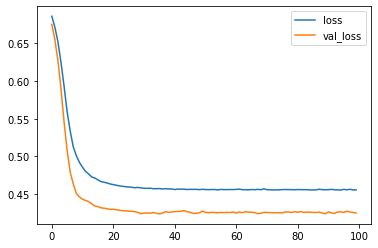

In [180]:
hist_df = pd.DataFrame(hist.history)
hist_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(hist_df['val_loss'].min()))

### Predictions

In [190]:
#making predictions
y_pred = (final_model.predict_classes(X_test_scaled) > 0.5).astype('int32')
y_pred[0:5]

array([[0],
       [1],
       [0],
       [0],
       [0]])

In [191]:
y_test[0:5]

array([1, 1, 0, 0, 0], dtype=int64)

### Evaluation

In [192]:
from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7974683544303798
              precision    recall  f1-score   support

           0       0.81      0.93      0.86        54
           1       0.76      0.52      0.62        25

    accuracy                           0.80        79
   macro avg       0.79      0.72      0.74        79
weighted avg       0.79      0.80      0.79        79



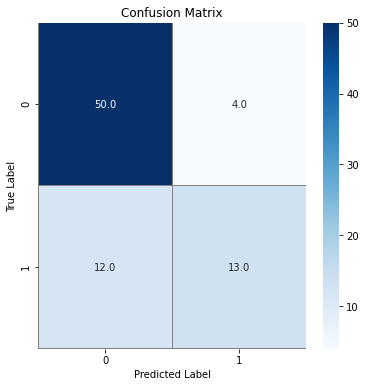

In [196]:
from sklearn.metrics import confusion_matrix

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred) 

# plot the confusion matrix
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Conclusion

- **The model was able to achieve an accuracy of about 80%.**
- **There are total 79 instances in the test set. Out of those 54 have true label 0 and 25 as 1.**
- **Out of 54  samples with class 0, the model has predicted 4 as false positives.**
- **Out of 25 samples with class 1, the model has predicted 12 as false negatives.**



